# Seven methods in reading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###A. web get

In [ ]:
# !wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

# df = pd.read_csv("iris.csv")
# df.head()

###B. From Google Drive

In [ ]:
# google download
# !gdown https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

# google download from id*
# !gdown --id 6f9306ad21398ea43cba4f7d537619d0e07d5ae3

### C. Requests package

In [ ]:
# import requests

# json_url = "https://gist.githubusercontent.com/xprilion/33cc85952d317644c944274ee6071547/raw/300db56b3b4cc2d5f99d7dde9b4274ac433fef12/iris.json"
# response = requests.get(json_url)

# if response.status_code == 200:
#     data = response.json()
#  #convert json file to tabular format(data frame)
#     df = pd.DataFrame(data)
#     print(df.head()) # in if cluase you need to use print to see the result
# else :
#     print("you are not allowed to access to this file")

### D. From Kaggle (API)

In [ ]:
# from google.colab import files

# print("upload your kaggle.jason")
# uploaded = files.upload()

# !mkdir -p ~/.kaggle #make directory
# !cp kaggle.json ~/.kaggle #copy
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d uciml/iris --force

# # !unzip /content/iris.zip
# # !rm iris.zip

# df = pd.read_csv("iris.csv")
# df.head()

### E. from hugging face

In [ ]:
!pip install datasets

from datasets import load_dataset

ds = load_dataset("scikit-learn/iris")

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'],
        num_rows: 150
    })
})

In [ ]:
df = pd.DataFrame(ds["train"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### F. using Sklearn

In [ ]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# iris

#IRIS EDA

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df = df.drop(["Id"], axis=1)

In [ ]:
for col in df.select_dtypes(include=["float64"]):
    df[col] = df[col].astype("float16")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float16
 1   SepalWidthCm   150 non-null    float16
 2   PetalLengthCm  150 non-null    float16
 3   PetalWidthCm   150 non-null    float16
 4   Species        150 non-null    object 
dtypes: float16(4), object(1)
memory usage: 2.5+ KB


In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']

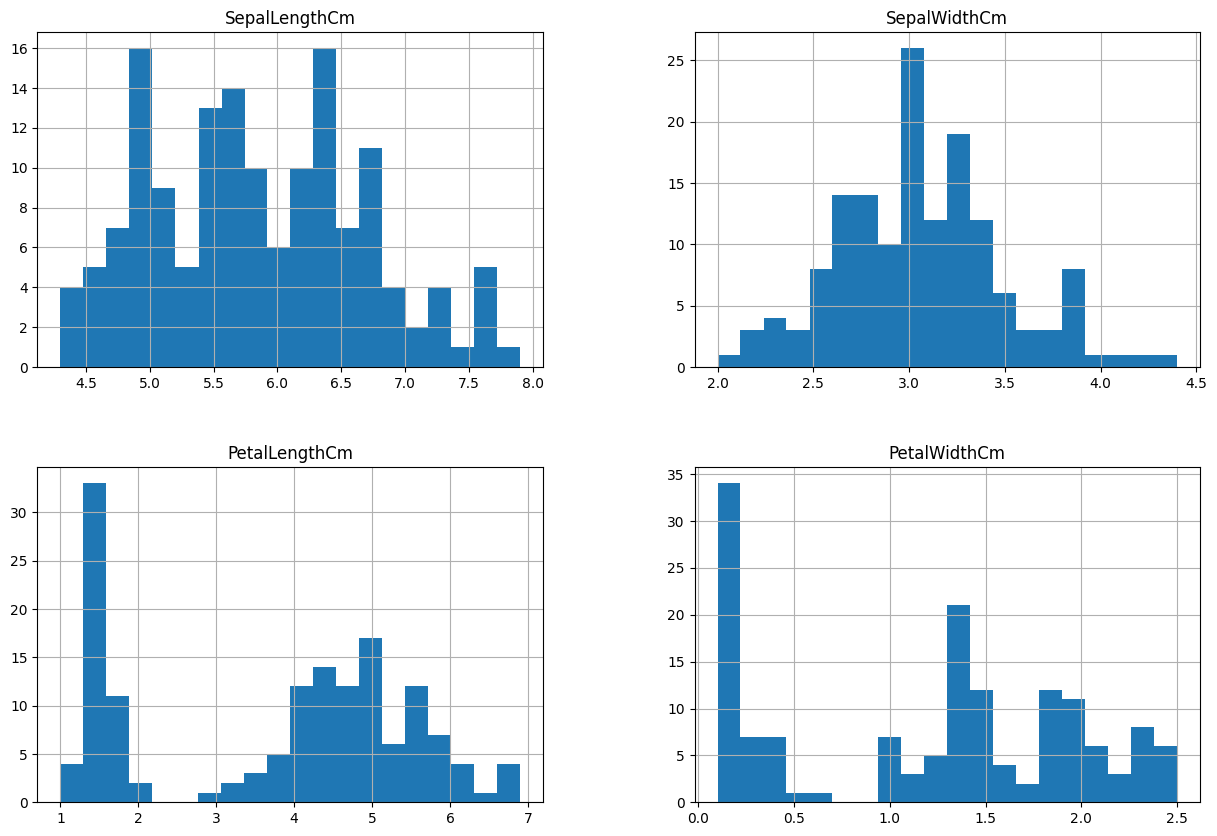

In [ ]:
df[feature_cols].hist(bins=20, figsize=(15,10))
plt.show()

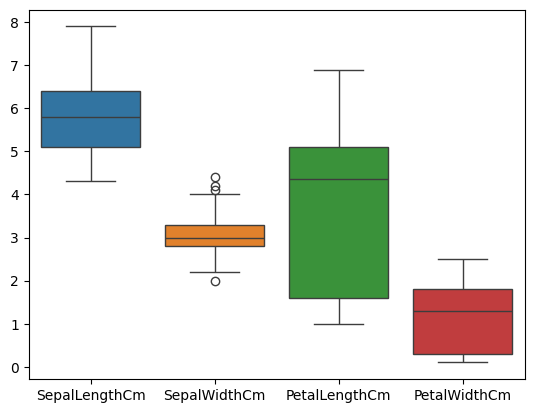

In [ ]:
sns.boxplot(data=df[feature_cols])
plt.show()